In [73]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=4)
tf.__version__

'2.7.0'

In [74]:
samples = 100
x_train = tf.linspace(0, 100, samples)
y = tf.linspace(0, 100, samples) 
y_train = y + tf.random.normal([samples], 3, 10, tf.double)

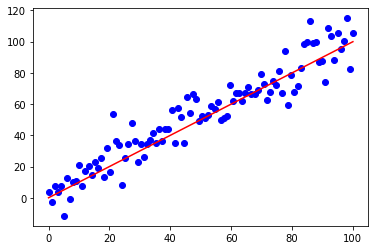

In [75]:
plt.scatter(x_train, y_train, c='blue')
plt.plot(x_train, y, c='red')

In [76]:
learning_rate = 0.005
epoches = 2000

normalizer = layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(x_train)

model = Sequential([
    normalizer,
    layers.Dense(5, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

2021-12-24 01:07:07.852697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-24 01:07:07.876292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [77]:
model.predict(x_train[:10])

2021-12-24 01:07:08.076236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[1.0274],
       [1.0066],
       [0.9859],
       [0.9651],
       [0.9443],
       [0.9236],
       [0.9028],
       [0.8821],
       [0.8613],
       [0.8406]], dtype=float32)

In [78]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=learning_rate),
    loss='mean_absolute_error')

In [79]:
%%time
history = model.fit(
    x_train,
    y_train,
    epochs=epoches,
    verbose=0,
    validation_split = 0.2)

2021-12-24 01:07:08.319294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-24 01:07:08.514824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


CPU times: user 54.9 s, sys: 26.4 s, total: 1min 21s
Wall time: 59.8 s


In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
1995,6.356913,10.731732,1995
1996,6.342987,10.712224,1996
1997,6.335959,10.684193,1997
1998,6.335697,10.662383,1998
1999,6.347294,10.663451,1999


In [81]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

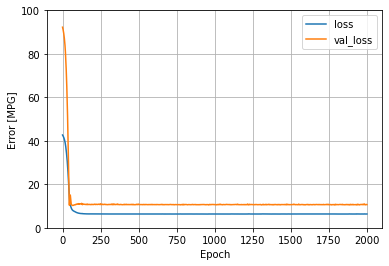

In [82]:
plot_loss(history)

In [83]:
x_test = tf.linspace(0, 100, samples)
y_test = model.predict(x_test)

2021-12-24 01:08:08.177248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


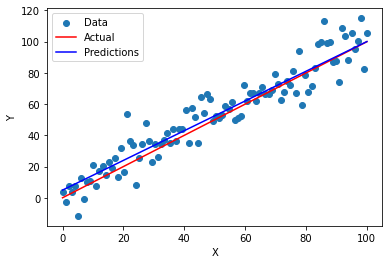

In [84]:
plt.scatter(x_train, y_train, label='Data')
plt.plot(x_train, y, color='r', label='Actual')
plt.plot(x_test, y_test, color='b', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()